In [18]:
import ROOT
import sys
import math
from __future__ import division
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [51]:
fin = ROOT.TFile.Open("tbnj_1000_01_01_2017/01/00/tree.root")

In [52]:
trees = fin.Get("Events")

In [36]:
e_frac=[]
angle=[]
weight=[]

In [37]:
evn=0
for it,t in enumerate(trees):
    genb = ROOT.TLorentzVector()
    wq1 = ROOT.TLorentzVector()
    wq2  =ROOT.TLorentzVector()
    for iy, y in enumerate(t.LHEPart_pdgId):
        #if iy==4:
        if iy==2:
            genb.SetPtEtaPhiM(t.LHEPart_pt[iy],t.LHEPart_eta[iy],t.LHEPart_phi[iy],t.LHEPart_mass[iy])
        #if iy==7:
        if iy==3:
            wq1.SetPtEtaPhiM(t.LHEPart_pt[iy],t.LHEPart_eta[iy],t.LHEPart_phi[iy],t.LHEPart_mass[iy])
            if abs(y)%2!=0:
                wd=wq1
        #if iy==8:
        if iy==4:
            wq2.SetPtEtaPhiM(t.LHEPart_pt[iy],t.LHEPart_eta[iy],t.LHEPart_phi[iy],t.LHEPart_mass[iy])
            if abs(y)%2!=0:
                wd=wq2
        #print y,t.LHEPart_spin[iy],t.LHEPart_pt[iy]
    gentop = genb + wq1 + wq2
    if gentop.Pt()<300:
        continue
    e_frac.append(genb.E()/gentop.E())
    bst = gentop.BoostVector()
    wd.Boost(-bst)
    d_v3=wd.Vect()
    t_v3=gentop.Vect()
    angle.append(d_v3.Dot(t_v3)/(d_v3.Mag()*t_v3.Mag()))
    weight.append(gentop.Pt())
    #break
    #print "new event",t.event
    evn+=1
    if evn>21833:
    #if it>10:
        break

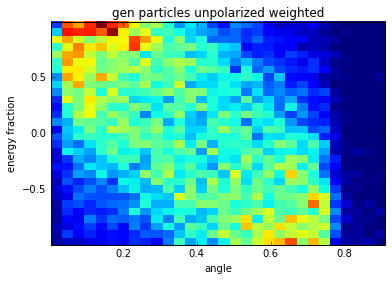

In [38]:
plt.hist2d(e_frac,angle,weights=weight,bins=30)
plt.xlabel('angle')  
plt.ylabel('energy fraction')  
plt.title("gen particles unpolarized weighted") 
plt.show()

In [ ]:
trees.Print()

In [9]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [47]:
corr, _ = spearmanr(e_frac, angle)

In [48]:
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: -0.396


In [49]:
corr, _ = pearsonr(e_frac, angle)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.397


In [82]:
A=[]
for it,t in enumerate(trees):
    genb = ROOT.TLorentzVector()
    wq1 = ROOT.TLorentzVector()
    wq2  =ROOT.TLorentzVector()
    for iy, y in enumerate(t.LHEPart_pdgId):
        #if iy==4:
        if iy==2:
            genb.SetPtEtaPhiM(t.LHEPart_pt[iy],t.LHEPart_eta[iy],t.LHEPart_phi[iy],t.LHEPart_mass[iy])
        #if iy==7:
        if iy==3:
            wq1.SetPtEtaPhiM(t.LHEPart_pt[iy],t.LHEPart_eta[iy],t.LHEPart_phi[iy],t.LHEPart_mass[iy])
            if abs(y)%2!=0:
                wd=wq1
        #if iy==8:
        if iy==4:
            wq2.SetPtEtaPhiM(t.LHEPart_pt[iy],t.LHEPart_eta[iy],t.LHEPart_phi[iy],t.LHEPart_mass[iy])
            if abs(y)%2!=0:
                wd=wq2
        #print y,t.LHEPart_spin[iy],t.LHEPart_pt[iy]
    gentop = genb + wq1 + wq2
    if gentop.Pt()<300:
        continue
    pj=[gentop.Px(),gentop.Py(),gentop.Pz()]
    p1=[genb.Px(),genb.Py(),genb.Pz()]
    p2=[wq1.Px(),wq1.Py(),wq1.Pz()]
    A.append([pj,p1,p2])

In [117]:
def gs(X):
    Q, R = np.linalg.qr(X)
    return Q

In [95]:
np_A=np.array(A)

In [108]:
np_A[:,0]

array([[-470.30771166,   26.16290648,  628.77644278],
       [ -72.56922872,  -22.65546495,  188.61113963],
       [ -87.94682428,   38.34200742,   73.43260338]])

In [107]:
np.linalg.norm(np_A[1])

820.478203266458

In [127]:
n = len(np_A)
for i in range(0,n):
    v1 = np_A[i,0]/np.linalg.norm(np_A[i,0])
    v2 = np_A[i,1]/np.linalg.norm(np_A[i,1])
    v3 = np_A[i,2]/np.linalg.norm(np_A[i,2])
    print gs([v1,v2,v3])
    break

[[-0.49213465  0.53266269 -0.68853028]
 [-0.70002337 -0.71231683 -0.05071504]
 [-0.51746571  0.45702866  0.72343212]]


In [61]:
n = len(A)

A[:, 0] = normalize(A[:, 0])

for i in range(1, n):
    Ai = A[:, i]
    for j in range(0, i):
        Aj = A[:, j]
        t = Ai.dot(Aj)
        Ai = Ai - t * Aj
    A[:, i] = normalize(Ai)

1


/cvmfs/cms.cern.ch/slc7_amd64_gcc700/external/py2-ipykernel/4.8.2-gnimlf2/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  
